# 词义的力量 

## —— 斯特鲁普效应实验数据分析 

# Words matter? 

## —— Data Analysis of Stroop Effect Experiment 

## 1. 前言 Introduction

### 1.1 斯特鲁普效应简介 Introduction of Stroop Effect 

当文字的颜色与词义不一致时，词义会对反应时间产生干扰。1935年 John Ridley Stroop 发表了文章以后，该现象就被称为斯特鲁普效应（Stroop effect）[1]。具体的实验是：说出文字的颜色，而不是文字本身。比如“红色”这两个字以蓝色印刷（"RED" is printed in a blue colour），这时参与者读出“蓝色”（BLUE）[2]。当文字的字义与印刷的颜色一致时，称为 Congruent；不一致时，称为 Incongruent。实验发现 Incogruent 的时候，参与者阅读的时间更长，因此实验的结论是词义（semantic meaning）对颜色的识别产生了干扰，称为词义干扰（semantic interference）。

### 1.2 本项目总览 Project overview 

现有一份斯特鲁普效应的实验数据（随文件所带）。在此基础上拟进行的工作包括：

* 描述性统计
  * 用描述统计的方法分析实验数据
* 推论统计
  * 建立假设
  * 用样本数据进行假设检验
  * 得出检验结果
* 结论部分

## 2. 描述性统计 Descriptive statistics

两种实验数据，一种是 Congruent （词义与颜色一致），另一种是 Incongruent（词义与颜色不一致）。

为了进行后面的工作，先引入必要的 Python 包。

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

用 pandas 读入数据文件：

In [2]:
stroop = pd.read_csv('stroopdata.csv')

查看数据头部，确认数据读入正常：

In [3]:
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


用 numpy 分别对 Congruent 与 Incongruent 数据进行处理：

In [4]:
congruent = np.array(stroop['Congruent'])
incongruent = np.array(stroop['Incongruent'])

### 2.1 Congruent 部分数据描述性统计

**统计性描述结果：**

In [5]:
print("-"*5,"Congruent 部分","-"*5)
print("平均阅读时间（mean）：", congruent.mean())
print("方差（variance）：", congruent.var(ddof=1))  # ddof=1，表示除以 n-1
print("标准差（standard deviation）：", congruent.std(ddof=1))
print("最小值（min）：", congruent.min())
print("最大值（max）：", congruent.max())
print("第一四分位数（25th percentile）：", np.percentile(congruent, 25))
print("中位数（median）：", np.median(congruent))
print("第三四分位数（75th percentile）：", np.percentile(congruent, 75))
print("样本数量（sample size）：", congruent.size)

----- Congruent 部分 -----
平均阅读时间（mean）： 14.051125
方差（variance）： 12.6690290707
标准差（standard deviation）： 3.55935795765
最小值（min）： 8.63
最大值（max）： 22.328
第一四分位数（25th percentile）： 11.89525
中位数（median）： 14.3565
第三四分位数（75th percentile）： 16.20075
样本数量（sample size）： 24


**数据的分布用盒形图（box plot）视觉化，没有出现异常值（outlier）。数据呈现正偏斜。**

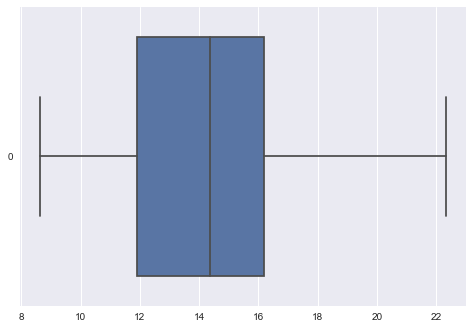

In [6]:
sns.boxplot(data=stroop['Congruent'], orient='h')

**直方图发现 Congruent 的样本数据接近正态分布，有一定程度的正偏斜（positive skewed）**

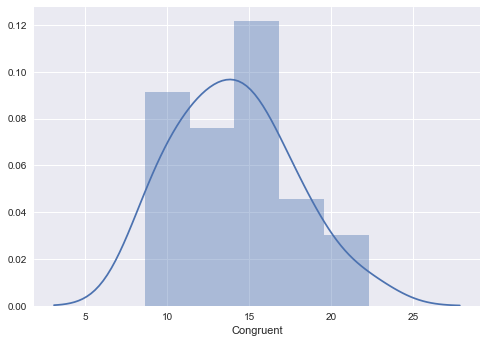

In [7]:
sns.distplot(stroop['Congruent'])

**用 rug 图也可以看见数据在 10-15 区间的密度较大。**

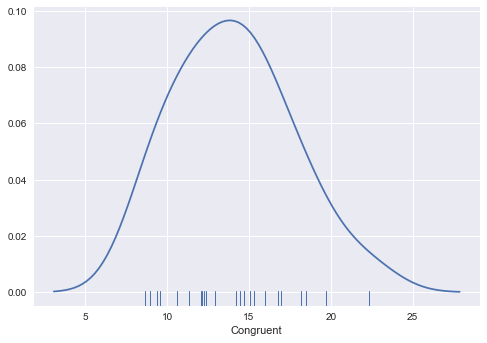

In [8]:
sns.distplot(stroop['Congruent'], hist=False, rug=True)

Congruent 数据最终确定样本数量是 24，具体数据如下。

In [9]:
print(congruent)
print("Congruent sample size: ", congruent.size)

[ 12.079  16.791   9.564   8.63   14.669  12.238  14.692   8.987   9.401
  14.48   22.328  15.298  15.073  16.929  18.2    12.13   18.495  10.639
  11.344  12.369  12.944  14.233  19.71   16.004]
Congruent sample size:  24


### 2.2 Incongruent 部分数据描述性统计

**统计性描述结果：**

In [10]:
print("-"*5,"Incongruent 部分","-"*5)
print("平均阅读时间：", incongruent.mean())
print("方差：", incongruent.var(ddof=1))
print("标准差：", incongruent.std(ddof=1))
print("最小值：", incongruent.min())
print("最大值：", incongruent.max())
print("第一四分位数", np.percentile(incongruent, 25))
print("中位数：", np.median(incongruent))
print("第三四分位数", np.percentile(incongruent, 75))
print("样本数据：", incongruent.size)

----- Incongruent 部分 -----
平均阅读时间： 22.0159166667
方差： 23.0117570362
标准差： 4.79705712247
最小值： 15.687
最大值： 35.255
第一四分位数 18.71675
中位数： 21.0175
第三四分位数 24.0515
样本数据： 24


**盒形图中发现 Incongruent 数据中最大的两个值是异常值**

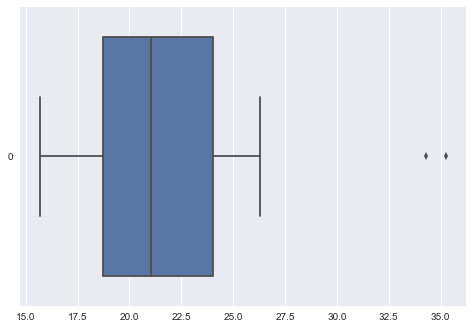

In [11]:
sns.boxplot(data=stroop['Incongruent'], orient='h')

用直方图发现出现了两个峰。

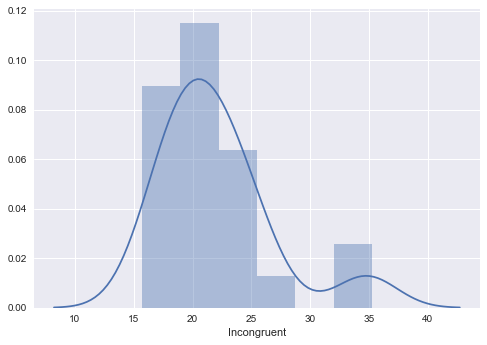

In [12]:
sns.distplot(stroop['Incongruent'])

较小的峰是由两个异常值产生的。

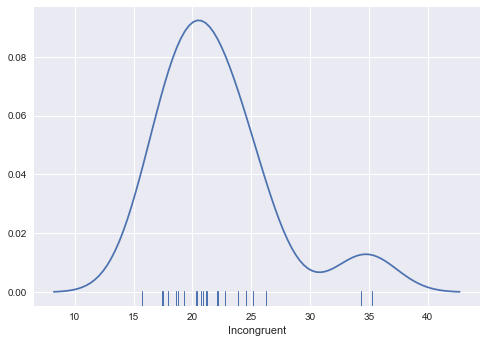

In [13]:
sns.distplot(stroop['Incongruent'], hist=False, rug=True)

Incongruent 数据最终确定样本数量是 24，具体数据如下。

In [14]:
print(incongruent)
print("Incongruent sample size: ", incongruent.size)

[ 19.278  18.741  21.214  15.687  22.803  20.878  24.572  17.394  20.762
  26.282  24.524  18.644  17.51   20.33   35.255  22.158  25.139  20.429
  17.425  34.288  23.894  17.96   22.058  21.157]
Incongruent sample size:  24


### 2.3 描述性统计部分总结 Conclusion of descriptive statistics part
对斯特鲁普效应实验的数据进行了描述性统计分析。用盒形图发现 Incongruent 在最大值方向有两个异常值。用 removeOutliers 函数删除了异常值，并形成新的 numpy array。

最终得到两个数组如下所示。后面的推论统计部分将在这两个数据的基础上进行。

In [15]:
congruent

array([ 12.079,  16.791,   9.564,   8.63 ,  14.669,  12.238,  14.692,
         8.987,   9.401,  14.48 ,  22.328,  15.298,  15.073,  16.929,
        18.2  ,  12.13 ,  18.495,  10.639,  11.344,  12.369,  12.944,
        14.233,  19.71 ,  16.004])

In [16]:
incongruent

array([ 19.278,  18.741,  21.214,  15.687,  22.803,  20.878,  24.572,
        17.394,  20.762,  26.282,  24.524,  18.644,  17.51 ,  20.33 ,
        35.255,  22.158,  25.139,  20.429,  17.425,  34.288,  23.894,
        17.96 ,  22.058,  21.157])

## 3. 推论统计 Inference statistics

### 3.1 结论预览 Preview of conclusion
双样本的零假设为两种实验结果一样。T检验结果表明：实验结果的 t 值为-7.16，实验结果一致的概率 P = 7.30e-9，远小于 0.1%。即使按照 99.9% 的要求，零假设也被拒绝。结论意味着两种实验的结果并不一致，Congruent 实验的平均阅读时间确实小于 Incongruent 的平均阅读时间。

In [17]:
stats.ttest_ind(a= congruent,
                b= incongruent,
                equal_var=False)

Ttest_indResult(statistic=-6.5322505539032285, pvalue=6.5101673904426379e-08)

下面按照推论统计的步骤详细推导。

### 3.2 推论统计具体步骤（包含异常值）  Detailed inference statistics (with outliers)
先考虑排除异常值的情况。 

详细的推论统计步骤包括：
* (A) 假设检验
    * (A-1) 识别因变量与处理条件
        * 因变量 (dependent variable)
        * 处理条件 (treatment)
    * (A-2) 建立假设
        * 零假设 (null hypothesis)
        * 备择假设 (alternative hypothesis)
        * 假设类型 (type of hypothesis)
    * (A-3) 找到 t-critical
        * 选择检验方式
        * 设定alpha值 (alpha leve)
        * 计算自由度 (degree of freedom)
        * 获得 t-critical
    * (A-4) 计算 t-statistic
        * 计算两种样本的平均值 (mean)
        * 找到两种样本大小 (sample size)
        * 计算两种样本的方差之和 (sum of variance)
        * 获得合并方差 (pooled variance)
        * 计算标准误差 (standard error)
        * 得到样本的 t 值 (t-statistic)
    * (A-5) 对比 t 值，得出检验结论
* (B) 置信区间 (confidence interval)
    * (B-1) 误差范围 (margin of error)
    * (B-2) 置信区间 (CI)
* (C) 测量效应强度 (effect size measures)
    * (C-1) 相关性分析 (correlation)   

#### (A) 假设检验
##### (A-1) 识别因变量与处理条件
###### 因变量 (dependent variable)
参与者识别出颜色的总时间。
###### 自变量 (independent variable)
自变量是实验的种类，具体而言是实验中颜色与词义是否一致。颜色与词义一致时，称为 Congruent；不一致时则是 Incongruent。
###### 相依样本
本实验为相依样本，即对于不同种类的配对实验的结果差异对比。


##### (A-2) 建立假设

###### 零假设 (null hypothesis)
词义与颜色是否一致，都不会影响阅读者识别颜色的时间。其中 $\mu_{1}$表示 Congruent 样本的平均时间， $\mu_{2}$ 表示 Incongruent 样本的平均时间。


$$
\begin{equation*}
H_{0}: \mu_{1} - \mu{2} = 0
\end{equation*}
$$

###### 备择假设 (alternative hypothesis)
词义与颜色不一致，就会影响阅读者识别颜色的时间。

$$
\begin{equation*}
H_{A}: \mu_{1} - \mu{2} \neq 0
\end{equation*}
$$

###### 选择检验方式：T检验
该项目选择T检验而不是Z检验。判断选择Z检验还是T检验的标准主要有两点：首先是否能够获取总体标准差，其次实验样本数量小于30。如果没有总体标准差的情况，选择T检验。即使有了总体标准差，如果样本数量小于30，也是选择T检验。

本项目的总体标准差位置，并且单个实验的样本数量也是小于30。因此选择T检验。

###### 假设类型 (hypothesis type)：双尾检验
双尾检验 (two-tailed test)。当 p 落入概率密度曲线两侧的 critical region 时，判定检测统计上显著。单位检验在skewed的分布上，产生error的可能性较高，而本项目中样本数据有一定程度的skewed，因此选择双尾检验。

##### (A-3) 找到 t-critical

###### 设定alpha值 (alpha leve)


$$
\begin{equation*}
\alpha = 0.05
\end{equation*}
$$

###### 计算自由度 (degree of freedom)
这里不剔除 outliers，所以样本数量$n_{1}$与$n_{2}$都是24。

$$
\begin{equation*}
df = n_{1} + n_{2} - 2 = 24 + 24 - 2 = 46
\end{equation*}
$$

###### 获得 t-critical
根据以上两个条件，使用 [GraphPad](http://www.graphpad.com/quickcalcs/) 的计算：

$$
\begin{equation*}
t_{critical} = \pm2.0129
\end{equation*}
$$

##### (A-4) 计算 t-statistic
###### 计算两种样本的平均值 (mean)
根据描述性统计的结果，把两个样本的算术平均值四舍五入到小数点后两位得到：

In [19]:
x = congruent.mean() # mean of sample Congruent
y = incongruent.mean() # mean of sample Incongruent
print ("Mean of sample Congruent:", x)
print ("Mean of sample Incongruent:", y)

Mean of sample Congruent: 14.051125
Mean of sample Incongruent: 22.0159166667


$$
\begin{equation*}
\bar{x} = 14.051125 \\
\bar{y} = 22.0159166667
\end{equation*}
$$

样本的均值差 (mean difference) 为：

In [21]:
dif_array = incongruent - congruent
print ("Differences of two samples:", dif_array)

Differences of two samples: [  7.199   1.95   11.65    7.057   8.134   8.64    9.88    8.407  11.361
  11.802   2.196   3.346   2.437   3.401  17.055  10.028   6.644   9.79
   6.081  21.919  10.95    3.727   2.348   5.153]


$$
\begin{equation*}
d_{i} = y_{i} - x_{i}
\end{equation*}
$$

In [30]:
dif_mean = dif_array.mean()
print("The mean difference:", dif_mean)

The mean difference: 7.96479166667


###### 找到两种样本大小 (sample size)


In [31]:
n1 = congruent.size
n2 = incongruent.size
print("Congruent sample size, n1:", n1)
print("Incongruent sample size, n2:", n2)

Congruent sample size, n1: 24
Incongruent sample size, n2: 24


$$
\begin{equation*}
n_{1} = 24 \\
n_{2} = 24
\end{equation*}
$$

###### 计算 diffrences 的标准差

In [32]:
sd = dif_array.std(ddof=1)  # ddof, use "n-1" to calculate standard deviation
print("The standard deviation of the differences：", sd)

The standard deviation of the differences： 4.86482691036


###### Standard error of the mean difference

In [33]:
import math
n = dif_array.size
print("The size of difference array:", n)
se = sd/(math.sqrt(n))
print("The SE (standard error of the mean difference):", se)

The size of difference array: 24
The SE (standard error of the mean difference): 0.993028634778


$$
\begin{equation*}
SE(\bar{d}) = \frac{s_{d}}{\sqrt{n}} \\
\end{equation*}
$$

###### 得到样本的 t 值 (t-statistic)

In [34]:
t_statistic = dif_mean / se
print("t-statistic:", t_statistic)

t-statistic: 8.02070694411


$$
\begin{equation*}
t_{statistic} = 8.02070694411
\end{equation*}
$$

该值远大于$t_{critical}=2.0129$，所以在统计上显著。

##### (A-5) 对比 t 值，得出检验结论
对比 $t_{statistic} = 8.0207$ 与 $t_{critical} = \pm2.0129$ ，发现 $t_{statistic}$ 值已经落入了临界区域 (critical region)。

同样通过$t_{statistic}$ 与自由度 $df = 44$ 也可以得到双尾检测的P值小于 0.001。因此我们可以认为两个样本的t-检验 (two-sample t-test) 在统计上显著，结论是拒绝零假设。



$$
\begin{equation*}
Result: Reject\;H_{0}
\end{equation*}
$$

#### (B) 置信区间 (confidence interval)

##### (B-1) 误差范围 (margin of error)

In [35]:
t_critical = 2.0129
margin_of_error = t_critical * se 
print("Margin of error", margin_of_error)

Margin of error 1.99886733895


$$
\begin{equation*}
margin\;of\;error = (t_{critical} \times S_{\bar{X}-\bar{Y}} ) =  2.0154 \times 0.96 = 1.9989
\end{equation*}
$$

#### (B-2) 置信区间 (CI)

In [36]:
upper_bound = dif_mean + margin_of_error
lower_bound = dif_mean - margin_of_error
print ("Upper bound is", upper_bound)
print ("Lower bound is", lower_bound)

Upper bound is 9.96365900561
Lower bound is 5.96592432772


置信区间 (CI) 是 (5.9659, 9.9637)

#### (C) 测量效应强度 (effect size measures)


##### (C-1) 相关性分析 (correlation)

In [37]:
correlation = (t_statistic ** 2)/((t_statistic ** 2) + (n1 + n2 - 2))
print("The correlation is", correlation)

The correlation is 0.583075549713


$$
\begin{equation*}
r^{2} = \frac{t_{statistic}^2}{t_{statistic}^2 + df_{total}} = 0.5831 = 58.31\%
\end{equation*}
$$

意味着两种实验结果不一致，其中58.31%的原因可以用实验条件的差异来解释。

#### 推论统计总结（不含异常值）
在推论统计部分，我们认为斯特鲁普效应实验中，词义与颜色的不一致可能会产生不同的结果。为了进行检验，进行了以下工作：
* 自变量是实验的种类（词义与颜色一致为 Congruent，词义与颜色不一致为 Incongruent），因变量是阅读者按照要求读完材料的时间。
* 建立零检验：两种实验的阅读时间相同；备择检验是时间不同。因此检验类型是双尾t检验。
* 设定临界区域，临界值为0.05，得到临界t值为0.2019。
* 计算双样本的统计t值是8.0207。
* 样本统计t值已经落入临界区域，因此在统计上显著。
* 结果是拒绝零检验。


通过双样本t检验，在统计上不能认为斯特鲁普效应实验中的两种实验类型的结果一致。并且这种实验类型的不一致，可以解释58%的阅读时间不同。

## 4. 结论 Conclusion

斯特鲁普效应结论是词义会产生干扰。为了验证斯特鲁普效应，分别进行了两种实验：词义与文字颜色一致，以及词义与文字颜色一致。分别对两种实验的样本进行了描述性统计与推论性统计。在推论统计部分，以两种实验中阅读时间相同作为零假设，设定临界值alpha为0.05的水准，在经过双样本t检验以后，统计上显著地拒绝了零假设，即不能认为两种类型的实验阅读时间会一致。